In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding

In [4]:
dataset = pd.read_csv('Data/customers_raw.csv')
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
print('N. Osservazioni: ' + str(dataset.shape[0]))
print('N. Features: ' + str(dataset.shape[1]))

N. Osservazioni: 440
N. Features: 8


- **channel**:  canale di vendita (2 valori possibili) - Horeca (Hotel, Restaurant, Cafè), Retail 
- **region**: regione di vendita 3(3 valori possibili) - Lisbona, Oporto,  Altro
- **fresh**: spesa annuale in prodotti freschi
- **milk**: spesa annuale in prodotti
- **grocery**: spesa annuale in prodotti
- **frozen**: spesa annuale in prodotti
- **detergents_paper**: spesa annuale in prodotti
- **delicassen**: spesa annuale in prodotti

In [16]:
dataset.columns = [x.lower() for x in dataset.columns]

In [26]:
print(dataset.channel.value_counts())
print(dataset.region.value_counts())

1    298
2    142
Name: channel, dtype: int64
3    316
1     77
2     47
Name: region, dtype: int64


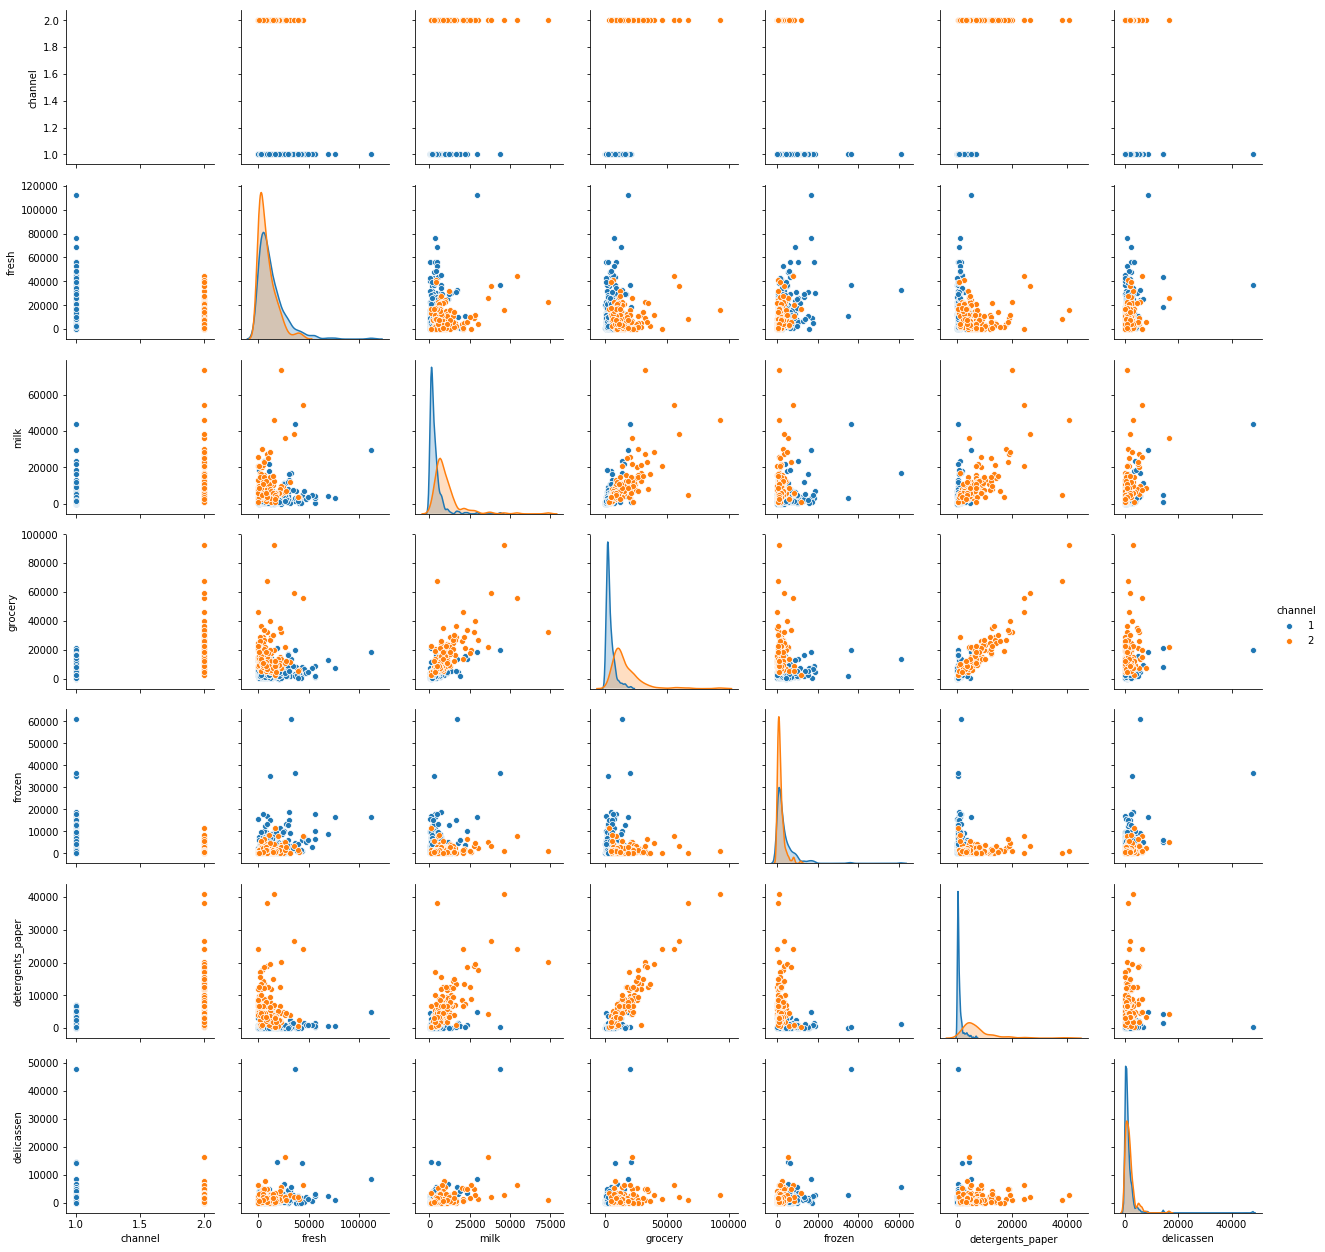

In [30]:
sns.pairplot(dataset.drop('region', axis=1), hue='channel')

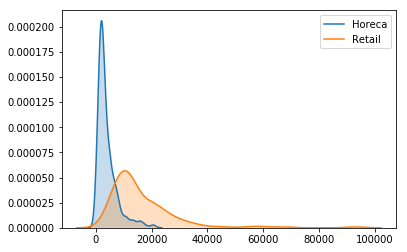

In [38]:
def double_kdeplot(data, feature, category_feature):
    
    sns.kdeplot(data[feature][data[category_feature]==1], label='Horeca', shade=True)
    sns.kdeplot(data[feature][data[category_feature]==2], label='Retail', shade=True)
    plt.show()
    
double_kdeplot(dataset, feature='grocery', category_feature='channel')

In [39]:
data_num = dataset.drop(['channel', 'region'], axis=1)

In [49]:
# scale feature
scaled_data = StandardScaler().fit_transform(data_num)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

C:\Users\riccardo.lavelli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\riccardo.lavelli\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [67]:
# pca
pca = PCA(n_components=2)
princomp = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data = princomp,
                           columns = ['pc1', 'pc2'])
pca_df = pd.concat([pca_df, dataset['channel']], axis = 1)

print('Variance explained: ' + str(pca.explained_variance_ratio_))

Variance explained: [0.44082893 0.283764  ]


In [58]:
pca_df.head()

,pc1,pc2,channel
0,0.193291,-0.305100,2
1,0.434420,-0.328413,2
2,0.811143,0.815096,2
3,-0.778648,0.652754,1
4,0.166287,1.271434,2


Text(0.5, 1.0, 'PCA')

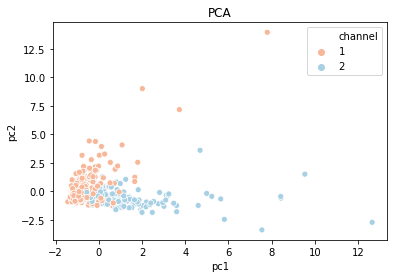

In [75]:
cmap = sns.color_palette("RdBu", n_colors=2)
sns.scatterplot(x='pc1', y='pc2', hue='channel', data=pca_df, palette=cmap).set_title('PCA')

In [73]:
# tsne
tsne = TSNE(n_components=2).fit_transform(scaled_data)
tsne_df = pd.DataFrame(data=tsne, 
                      columns=['x1', 'x2'])
tsne_df = pd.concat([tsne_df, dataset['channel']], axis=1)

In [74]:
tsne_df.head()

,x1,x2,channel
0,-7.029031,6.661765,2
1,-7.854959,10.423846,2
2,-2.119898,19.260801,2
3,11.576304,-15.897407,1
4,-9.822886,-5.727737,2


Text(0.5, 1.0, 't-SNE')

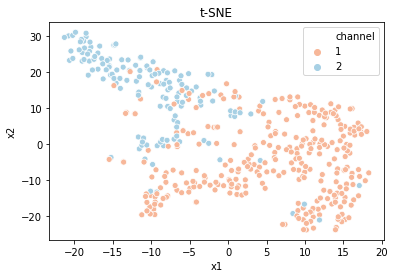

In [76]:
cmap = sns.color_palette("RdBu", n_colors=2)
sns.scatterplot(x='x1', y='x2', hue='channel', data=tsne_df, palette=cmap).set_title('t-SNE')

In [98]:
# lle
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20, random_state=42)
lle = lle.fit_transform(scaled_data)

lle_df = pd.DataFrame(data=lle, 
                      columns=['x1', 'x2'])
lle_df = pd.concat([lle_df, dataset['channel']], axis=1)

In [99]:
lle_df.head()

,x1,x2,channel
0,0.000685,0.016117,2
1,0.000643,0.016363,2
2,0.025117,-0.002127,2
3,-0.007709,-0.037944,1
4,0.032978,-0.033996,2


Text(0.5, 1.0, 'LLE')

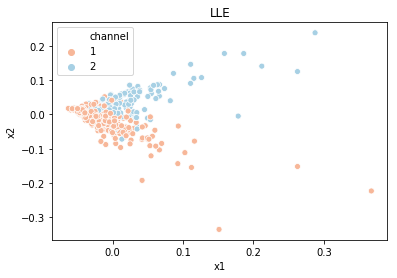

In [100]:
cmap = sns.color_palette("RdBu", n_colors=2)
sns.scatterplot(x='x1', y='x2', hue='channel', data=lle_df, palette=cmap).set_title('LLE')

---

Text(0.5, 1.0, 'PCA')

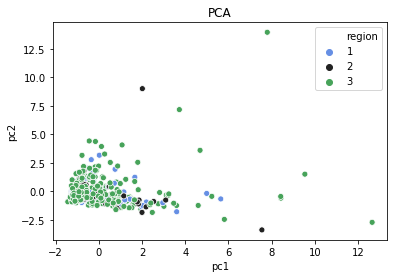

In [102]:
# pca
pca = PCA(n_components=2)
princomp = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data = princomp,
                           columns = ['pc1', 'pc2'])
pca_df = pd.concat([pca_df, dataset['region']], axis = 1)
cmap = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
sns.scatterplot(x='pc1', y='pc2', hue='region', data=pca_df, palette=cmap).set_title('PCA')

Text(0.5, 1.0, 't-SNE')

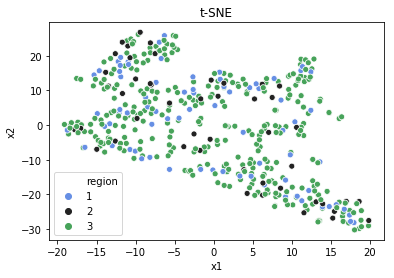

In [103]:
# tsne
tsne = TSNE(n_components=2).fit_transform(scaled_data)
tsne_df = pd.DataFrame(data=tsne, 
                      columns=['x1', 'x2'])
tsne_df = pd.concat([tsne_df, dataset['region']], axis=1)
cmap = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
sns.scatterplot(x='x1', y='x2', hue='region', data=tsne_df, palette=cmap).set_title('t-SNE')

Text(0.5, 1.0, 'LLE')

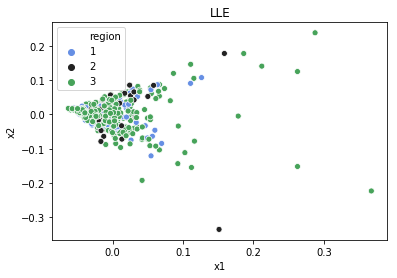

In [107]:
# lle
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20, random_state=42)
lle = lle.fit_transform(scaled_data)

lle_df = pd.DataFrame(data=lle, 
                      columns=['x1', 'x2'])
lle_df = pd.concat([lle_df, dataset['region']], axis=1)
cmap = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
sns.scatterplot(x='x1', y='x2', hue='region', data=lle_df, palette=cmap).set_title('LLE')